## Analyze A/B Test Results



## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists. 
For this project, we will be working to understand the results of an A/B test run by an e-commerce website.  The goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.


<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`. 

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b.  the number of rows in the dataset.

In [3]:
df.shape[0]

294478

total no of rows in data set is 294478

c. The number of unique users in the dataset.

In [4]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

Total unique users are 290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

proportions of users converted = 0.1196

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
df.query('landing_page =="new_page" and group=="control"').shape[0] + df.query('landing_page =="old_page" and group=="treatment"').shape[0]

3893

no of time mismatch = 3893

f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [8]:
df[df.isna()].count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

No columns have missing values

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page. 



In [9]:
df2= df.copy()
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [10]:
df2.drop(index = df2.query('landing_page =="new_page" and group=="control"').index,inplace = True, axis = 0)

In [11]:
df2.drop(index = df2.query('landing_page =="old_page" and group=="treatment"').index,inplace = True, axis = 0)

In [12]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [13]:
df2.shape

(290585, 5)

`3.`

a. How many unique **user_id**s are in **df2**?

In [14]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

There are 290584 unique values

b. There is one **user_id** repeated in **df2**.  What is it?

In [15]:
df2[df2.user_id.duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


773192 is the user id which is repeated

c. What is the row information for the repeat **user_id**? 

In [16]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
df2.drop_duplicates(subset = "user_id",inplace = True)

In [18]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [19]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
df2.groupby("group").describe()

converted                                                user_id  \
              count      mean       std  min  25%  50%  75%  max     count   
group                                                                        
control    145274.0  0.120386  0.325414  0.0  0.0  0.0  0.0  1.0  145274.0   
treatment  145310.0  0.118808  0.323564  0.0  0.0  0.0  0.0  1.0  145310.0   

                                                                       \
                    mean           std       min        25%       50%   
group                                                                   
control    788164.072594  91287.914601  630002.0  709279.50  788128.5   
treatment  787845.719290  91161.564429  630000.0  708745.75  787876.0   

                                
                 75%       max  
group                           
control    867208.25  945998.0  
treatment  866718.75  945999.0

probability of control group getting converted is 0.120386

c. Given that an individual was in the `treatment` group, what is the probability they converted?

probability of treatment group converted is 0.1188

d. What is the probability that an individual received the new page?

In [21]:
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

probability individual recieved the new page is 0.50061

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

1. There is very slight difference in the probability of getting converted under treatment and control group.
2. According to the probability old page seems to be better


#### There is not sufficient evidence to say whether old page is better than new page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

ho    **$p_{old}$**>= **$p_{new}$**  p old - p new >= 0



h1    **$p_{new}$** = **$p_{old}$** p new - p old > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [22]:
p = df2.converted.mean()

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [23]:
df2.converted.mean()

0.11959708724499628

c. What is $n_{new}$?

In [24]:
df2.query('landing_page == "new_page"').shape[0]

145310

d. What is $n_{old}$?

In [25]:
df2.query('landing_page == "old_page"').shape[0]

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [26]:
 new_page = np.random.binomial(1,p,df2.query('landing_page == "new_page"').shape[0])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [27]:
old_page = np.random.binomial(1,p,df2.query('landing_page == "old_page"').shape[0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [28]:
new_page = new_page[:145274]


In [41]:
obs_diff = (new_page/df2.query('landing_page == "new_page"').shape[0]) - (old_page/df2.query('landing_page == "old_page"').shape[0])
obs_diff.mean()

-4.183448017058352e-09

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [32]:
p_diffs = np.random.binomial(df2.query('landing_page == "new_page"').shape[0], p, 10000)/df2.query('landing_page == "new_page"').shape[0] - np.random.binomial(df2.query('landing_page == "old_page"').shape[0], p, 10000)/df2.query('landing_page == "old_page"').shape[0]

In [40]:
p_diffs

array([ 0.00081696,  0.00071372,  0.00164984, ...,  0.00053489,
        0.00199394, -0.00082798])

In [ ]:
#p_diffs = []
#for i in range(10000):
 #   old_page = np.random.binomial(1,p,df2.query('landing_page == "old_page"').shape[0]).mean()
  #  new_page = np.random.binomial(1,p,df2.query('landing_page == "new_page"').shape[0]).mean()
   # p_diffs.append(new_page-old_page)

i. Plot a histogram of the **p_diffs**. 

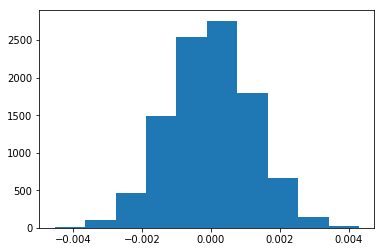

In [35]:
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [42]:
actual_diff = df.groupby("group").describe()["converted"]["mean"]["treatment"]-df.groupby("group").describe()["converted"]["mean"]["control"]

In [43]:
actual_diff

-0.0014795997940775518

In [48]:
(actual_diff < p_diffs).mean()

0.8891

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

1.The value we computed is p-value

2.If the P value is less than 0.05, we reject the null hypothesis; if P is greater than or equal to 0.05, we don't reject the null hypothesis.So in this case we accept the null hypothesis that is P_new<=p_old

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [49]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control' and converted == True").shape[0]
convert_new = df2.query("group == 'treatment' and converted == True").shape[0]
n_old = df2.query('group== "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

C:\Users\vishal sangwan\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [50]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

Z-score are measures of standard deviation.The critical Z score values when using a 95% confidence level are -1.96 and +1.96 standard deviations. The p-value associated with a 95% confidence level is 0.05. If your Z score is between -1.96 and +1.96, your p-value will be larger than 0.05, and you cannot reject your null hypothsis; the pattern exhibited is a pattern that could very likely be one version of a random pattern. If the Z score falls outside that range (for example -2.5 or +5.4), the pattern exhibited is probably too unusual to be just another version of random chance and the p-value will be small to reflect this. In this case, it is not possible to reject the null hypothesis and proceed with null hypothesis that new page conversion rate is either equal to or less than conversion rate of old page.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

we will use logistic regression as we want aither a converion or no conversion.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [51]:
df2["intercept"] = 1
df2[['control', 'treatment']] = pd.get_dummies(df['group'])

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [52]:
import statsmodels.api as sms

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [53]:
logit = sms.Logit(df2['converted'],df2[['intercept','treatment']])
results = logit.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-04-23 13:53 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
treatment    -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

here i first used summary but it did not work so i found this https://stackoverflow.com/questions/49814258/statsmodel-attributeerror-module-scipy-stats-has-no-attribute-chisqprob?utm_medium=organic&utm_source=google_rich_qa&utm_campaign=google_rich_qa

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

Our hypothesis here is:

$H_{0}$ : $p_{new}$ - $p_{old}$ = 0


$H_{1}$ : $p_{new}$ - $p_{old}$ != 0
### In this part p-values are used to determine which terms to keep in the regression model. A low p-value is likely to be a meaningful addition to the model and high p-value means the label has less effect on the model.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Its always a good idea to consider other factors to add into the regression model. we can always find out which factors have more effect on the model and use the factors which have more effect.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [54]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [55]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [56]:
df_new[["uk","us","ca"]] = pd.get_dummies(df_new["country"])

In [57]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,uk,us,ca
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [58]:
final_model = sm.Logit(df_new["converted"],df_new[["intercept","uk","us"]])
final_result = final_model.fit()
final_result.summary2()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-04-23 13:54 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
uk           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
us            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

From the p_values we can conclude that the countries with p_values near to 0 like uk has some effect on conversion rates whereas us has very less effect in the conversion rates.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [59]:
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,uk,us,ca
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0


In [61]:
f_model = sm.Logit(df_new["converted"],df_new[["intercept","uk","us","treatment"]])
f_result = f_model.fit()
f_result.summary2()


Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-04-23 14:04 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
uk           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
us            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
treatment    -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

In [65]:
df_new["page_country"] = df_new["treatment"]*df_new["us"]
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,control,treatment,uk,us,ca,page_country
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,0,0,1,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,0,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,0,1,0,1


In [66]:
f_model_pr = sm.Logit(df_new["converted"],df_new[["intercept","uk","us","treatment","page_country"]])
f_result_pr = f_model_pr.fit()
f_result_pr.summary2()


Optimization terminated successfully.
         Current function value: 0.366110
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2018-04-23 14:08 AIC:              212781.4204
No. Observations:   290584           BIC:              212834.3187
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
intercept        -1.9850   0.0095 -209.6902 0.0000 -2.0035 -1.9664
uk               -0.0407   0.0269   -1.5151 0.1298 -0.0934  0.0120
us               -0.0072   0.0187   -0.3873 0.6985 -0.0439  0.0294
treatment        -0.0236   0.0132   -1.7853 0.0742 -0.0495  0.0023
page_country      0.0344   0.0264    1.3057 0.1917 -0.0172  0.0861
==================================================================

"""

<a id='conclusions'></a>
## Conclusions

From the above results we can conclude that treatment page in us country may have some positive effect on conversion rate.We will accept the null hypothesis here and we can create new model hypothesis testing in which countries the new page lead to more conversion than older page. 




## Resources:
1. http://resources.esri.com/help/9.3/arcgisdesktop/com/gp_toolref/spatial_statistics_toolbox/what_is_a_z_score_what_is_a_p_value.htm